In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:

norm = np.random.normal(0, 1, [4, 1000])
logNorm = np.random.lognormal(0, 1, [2, 1000])
event = np.random.uniform(0, 1, [2, 1000])

print(f'normal : {norm} \n log normal: {logNorm} \n evently: {event}')

normal : [[-1.2105231   1.79722201  0.49434067 ...  1.90388495  0.24605665
   0.53901609]
 [ 1.13364788  0.24590233 -1.49190788 ...  1.1689534  -0.56897964
   1.98766938]
 [ 0.06175981  0.54768392 -0.04678554 ... -0.25160018  1.98596045
  -0.87764603]
 [ 1.05971667 -1.66297616 -0.39707171 ...  0.10406043  0.14630322
   0.24897108]] 
 log normal: [[ 1.39889036  0.53936257  3.83141668 ...  1.5624994   0.28660651
   0.26914549]
 [10.36505941  1.92974864  1.64072086 ...  0.56237498  1.45943945
   1.33145503]] 
 evently: [[0.36200787 0.26532422 0.28271345 ... 0.53077414 0.59208113 0.62330388]
 [0.20539776 0.0022263  0.39109353 ... 0.06605852 0.43961999 0.48350278]]


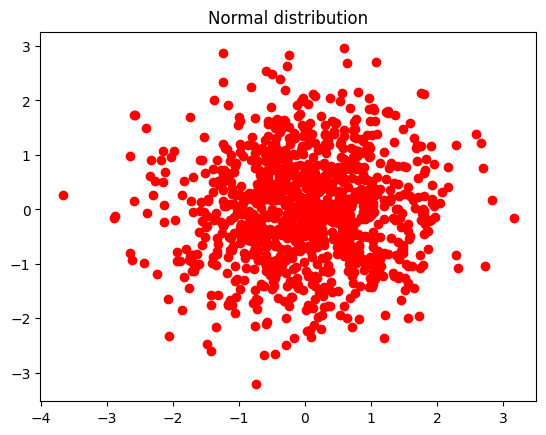

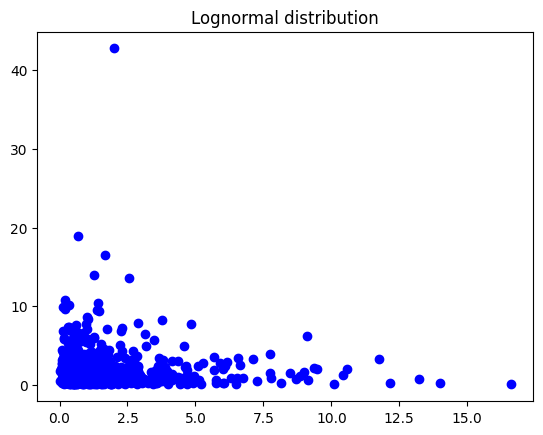

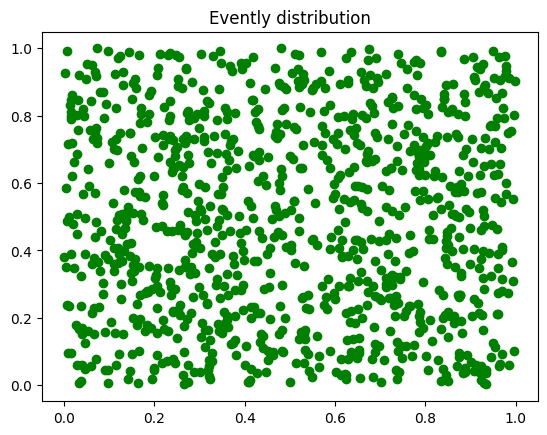

In [4]:
# count, bins, ignored = plt.hist(norm, 15, density=True)
# plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
# plt.plot(norm[1], norm[2])

plt.figure(1)
plt.scatter(norm[0], norm[1], color='red')
plt.title("Normal distribution")
# plt.show()

plt.figure(2)
plt.scatter(logNorm[0], logNorm[1], color='blue')
plt.title("Lognormal distribution")
# plt.show()


plt.figure(3)
plt.scatter(event[0], event[1], color='green')
plt.title("Evently distribution")
# plt.show()


plt.show()

In [5]:


import holoviews as hv
from holoviews import opts
hv.extension('matplotlib')

epsx = 5
betx = 6
alfx = 2.5
gamx = (1+alfx**2)/betx

epsy = 7
bety = 2
alfy = -1.9
gamy = (1+alfy**2)/bety

x_max  = np.sqrt(epsx*betx)
xp_max = np.sqrt(epsx*gamx)
y_max  = np.sqrt(epsy*bety)
yp_max = np.sqrt(epsy*gamy)

print(F"x_max = {x_max:10.5f}, x'_max = {xp_max:10.5f}")
print(F"y_max = {y_max:10.5f}, y'_max = {yp_max:10.5f}")

betxn = betx / epsx
alfxn = alfx / epsx
gamxn = gamx / epsx

betyn = bety / epsy
alfyn = alfy / epsy
gamyn = gamy / epsy

Qx = np.array([[gamxn,alfxn],[alfxn,betxn]])
Lx = np.linalg.cholesky(Qx)
Mx = np.linalg.inv(np.matrix.transpose(Lx))

Qy = np.array([[gamyn,alfyn],[alfyn,betyn]])
Ly = np.linalg.cholesky(Qy)
My = np.linalg.inv(np.matrix.transpose(Ly))

ang = np.linspace(0,2*np.pi,100)
XO = [[np.cos(a),np.sin(a)] for a in ang]

Xx = [np.matmul(Mx,XO[k]) for k in range(len(XO))]
Xy = [np.matmul(My,XO[k]) for k in range(len(XO))]

xxdim=hv.Dimension("x", range=(-6, 6))
xpdim=hv.Dimension("x'", range=(-6, 6))
yydim=hv.Dimension("y", range=(-6, 6))
ypdim=hv.Dimension("y'", range=(-6, 6))

Sx = hv.Curve((Xx)).redim(x=xxdim, y=xpdim).opts(show_grid=True, color="red")
Sy = hv.Curve((Xy)).redim(x=yydim, y=ypdim).opts(show_grid=True, color="red")
Sx+Sy

Np = 1000 # number of points
# x1 = np.random.normal(loc=0.0, scale=1.0, size=Np)
# x2 = np.random.normal(loc=0.0, scale=1.0, size=Np)
# x3 = np.random.normal(loc=0.0, scale=1.0, size=Np)
# x4 = np.random.normal(loc=0.0, scale=1.0, size=Np)

x1 = event[0]
x2 = event[1]
x3 = event[2]
x4 = event[3]

dim_x1 = hv.Dimension('x1', label='$x_1$', range=(-3,+3))
dim_x2 = hv.Dimension('x2', label='$x_2$', range=(-3,+3))
dim_x3 = hv.Dimension('x3', label='$x_3$', range=(-3,+3))
dim_x4 = hv.Dimension('x4', label='$x_4$', range=(-3,+3))

%opts Scatter [show_grid=True] (s=5.0)

Sc1 = hv.Scatter((x1,x2)).redim(x=dim_x1,y=dim_x2)
Sc2 = hv.Scatter((x3,x2)).redim(x=dim_x3,y=dim_x2)
Sc1+Sc2


n = np.sqrt(x1*x1 + x2*x2 + x3*x3 + x4*x4)
x1 = x1/n
x2 = x2/n
x3 = x3/n
x4 = x4/n
Sc1 = hv.Scatter((x1,x2)).redim(x=dim_x1,y=dim_x2)
Sc2 = hv.Scatter((x3,x2)).redim(x=dim_x3,y=dim_x2)
Sc1+Sc2


Q = np.array([[gamxn,alfxn,0,0],[alfxn,betxn,0,0],[0,0,gamyn,alfyn],[0,0,alfyn,betyn]])
L = np.linalg.cholesky(Q)
M = np.linalg.inv(np.matrix.transpose(L))
print(M)

XO4 = np.array([[x1[k],x2[k],x3[k],x4[k]] for k in range(Np)])
X = [np.matmul(M,XO4[k]) for k in range(Np)]
xx = np.array([X[k][0] for k in range(Np)])
xp = np.array([X[k][1] for k in range(Np)])
yy = np.array([X[k][2] for k in range(Np)])
yp = np.array([X[k][3] for k in range(Np)])

SR1 = hv.Scatter((xx,xp)).redim(x=xxdim, y=xpdim)
SR2 = hv.Scatter((yy,yp)).redim(x=yydim, y=ypdim)
SR3 = hv.Scatter((xx,yy)).redim(x=xxdim, y=yydim)

Mxy = np.array([[np.sqrt(epsx*betx),0],[0,np.sqrt(epsy*bety)]])
Xxy = [np.matmul(Mxy,XO[k]) for k in range(len(XO))]
Sxy = hv.Curve((Xxy)).redim(x=xxdim, y=yydim).opts(show_grid=True, color="red")

Sx*SR1+Sy*SR2+Sxy*SR3

ModuleNotFoundError: No module named 'holoviews'